In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import math

#import visualization_feature
from visualization_feature import *

In [11]:
# import sys
# import os

# # Get the absolute path of the parent directory and add it to sys.path
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../visualization/line_plot_func')))

# # Now import the module
# import line_plot

In [72]:
# Handling data
data = pd.read_csv('datasets/2881821.csv').drop(columns=['entry_id'])

# numeric_cols = data.select_dtypes(include=['number']).columns
# data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

data['created_at'] = pd.to_datetime(data['created_at'])
# .dt.floor('h')  # Convert created_at to datetime
data['created_at'] = data['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S').set_index('created_at')
# data = data.groupby(['created_at'])[numeric_cols].mean()


AttributeError: 'Series' object has no attribute 'set_index'

In [70]:
data

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2025-03-18 06:54:26,6.0,6.0,3.6,5.0,0.0,0.0,0.0,0.0
1,2025-03-18 06:54:43,6.0,4.0,2.4,3.0,10.0,10.0,10.0,10.0
2,2025-03-18 06:54:59,6.0,7.0,4.2,6.0,3.0,3.0,3.0,3.0
3,2025-03-18 06:55:16,9.0,4.0,3.6,5.0,13.0,13.0,13.0,13.0
4,2025-03-18 06:55:31,4.0,4.0,1.6,3.0,22.0,22.0,22.0,22.0
...,...,...,...,...,...,...,...,...,...
770,2025-03-19 07:01:36,5.0,4.0,2.0,4.0,675.0,675.0,675.0,675.0
771,2025-03-19 07:01:52,5.0,5.0,2.5,4.0,685.0,685.0,685.0,685.0
772,2025-03-19 07:02:09,4.0,4.0,1.6,4.0,695.0,695.0,695.0,695.0
773,2025-03-19 07:02:25,4.0,4.0,1.6,3.0,705.0,705.0,705.0,705.0


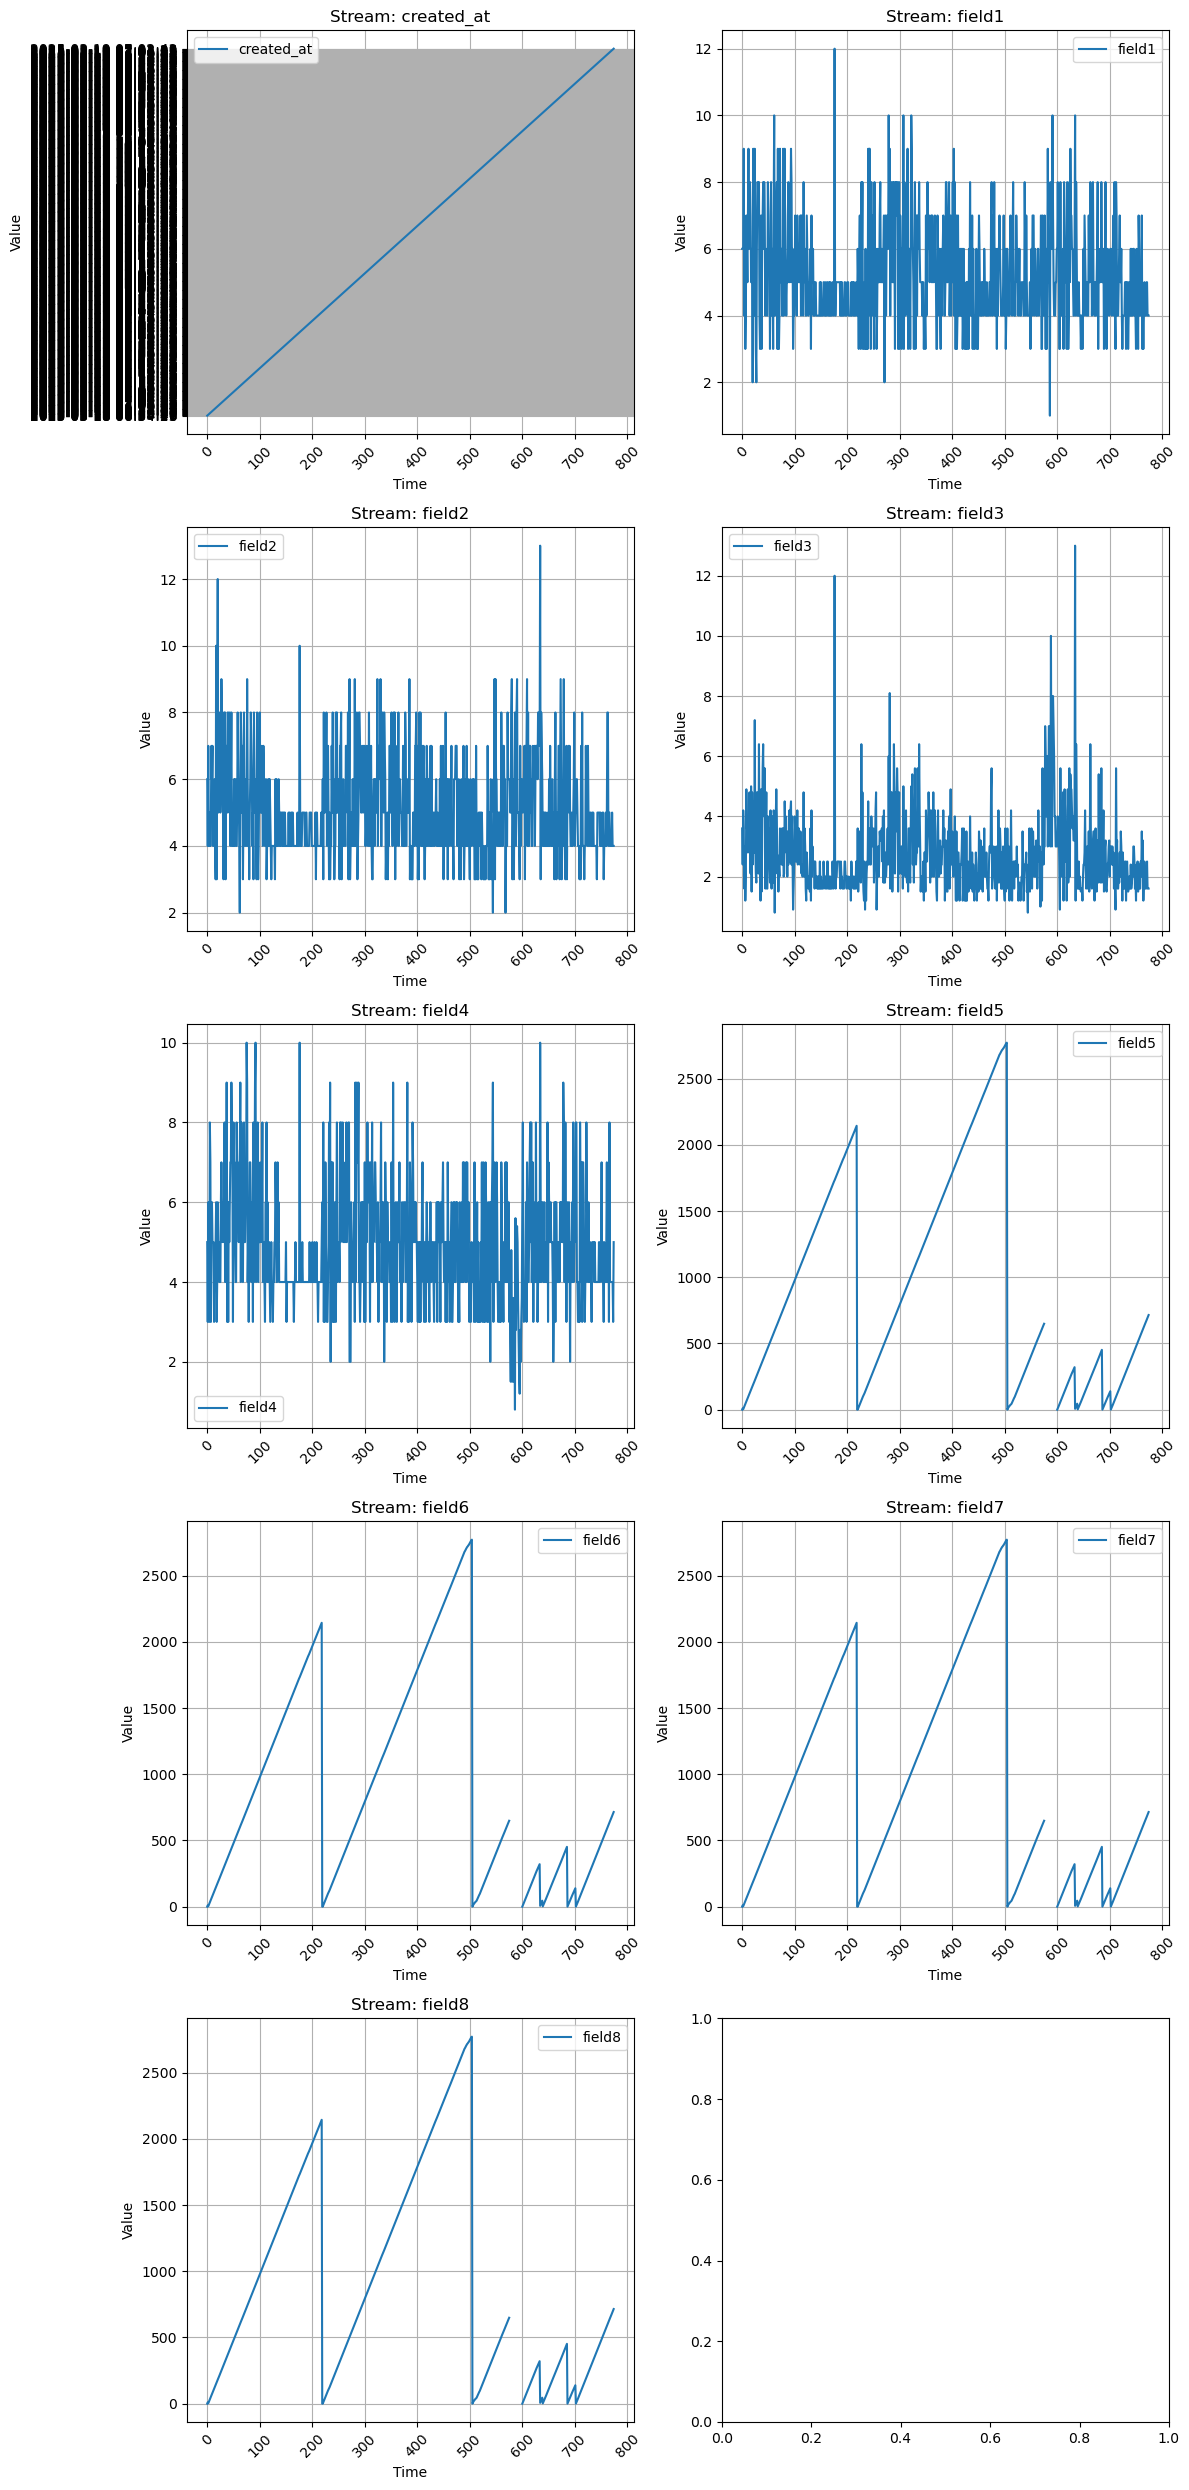

In [71]:
# Example usage 
line_plot_func.line_plot(data, streams=None, start_time=None, end_time=None, normalise=False)

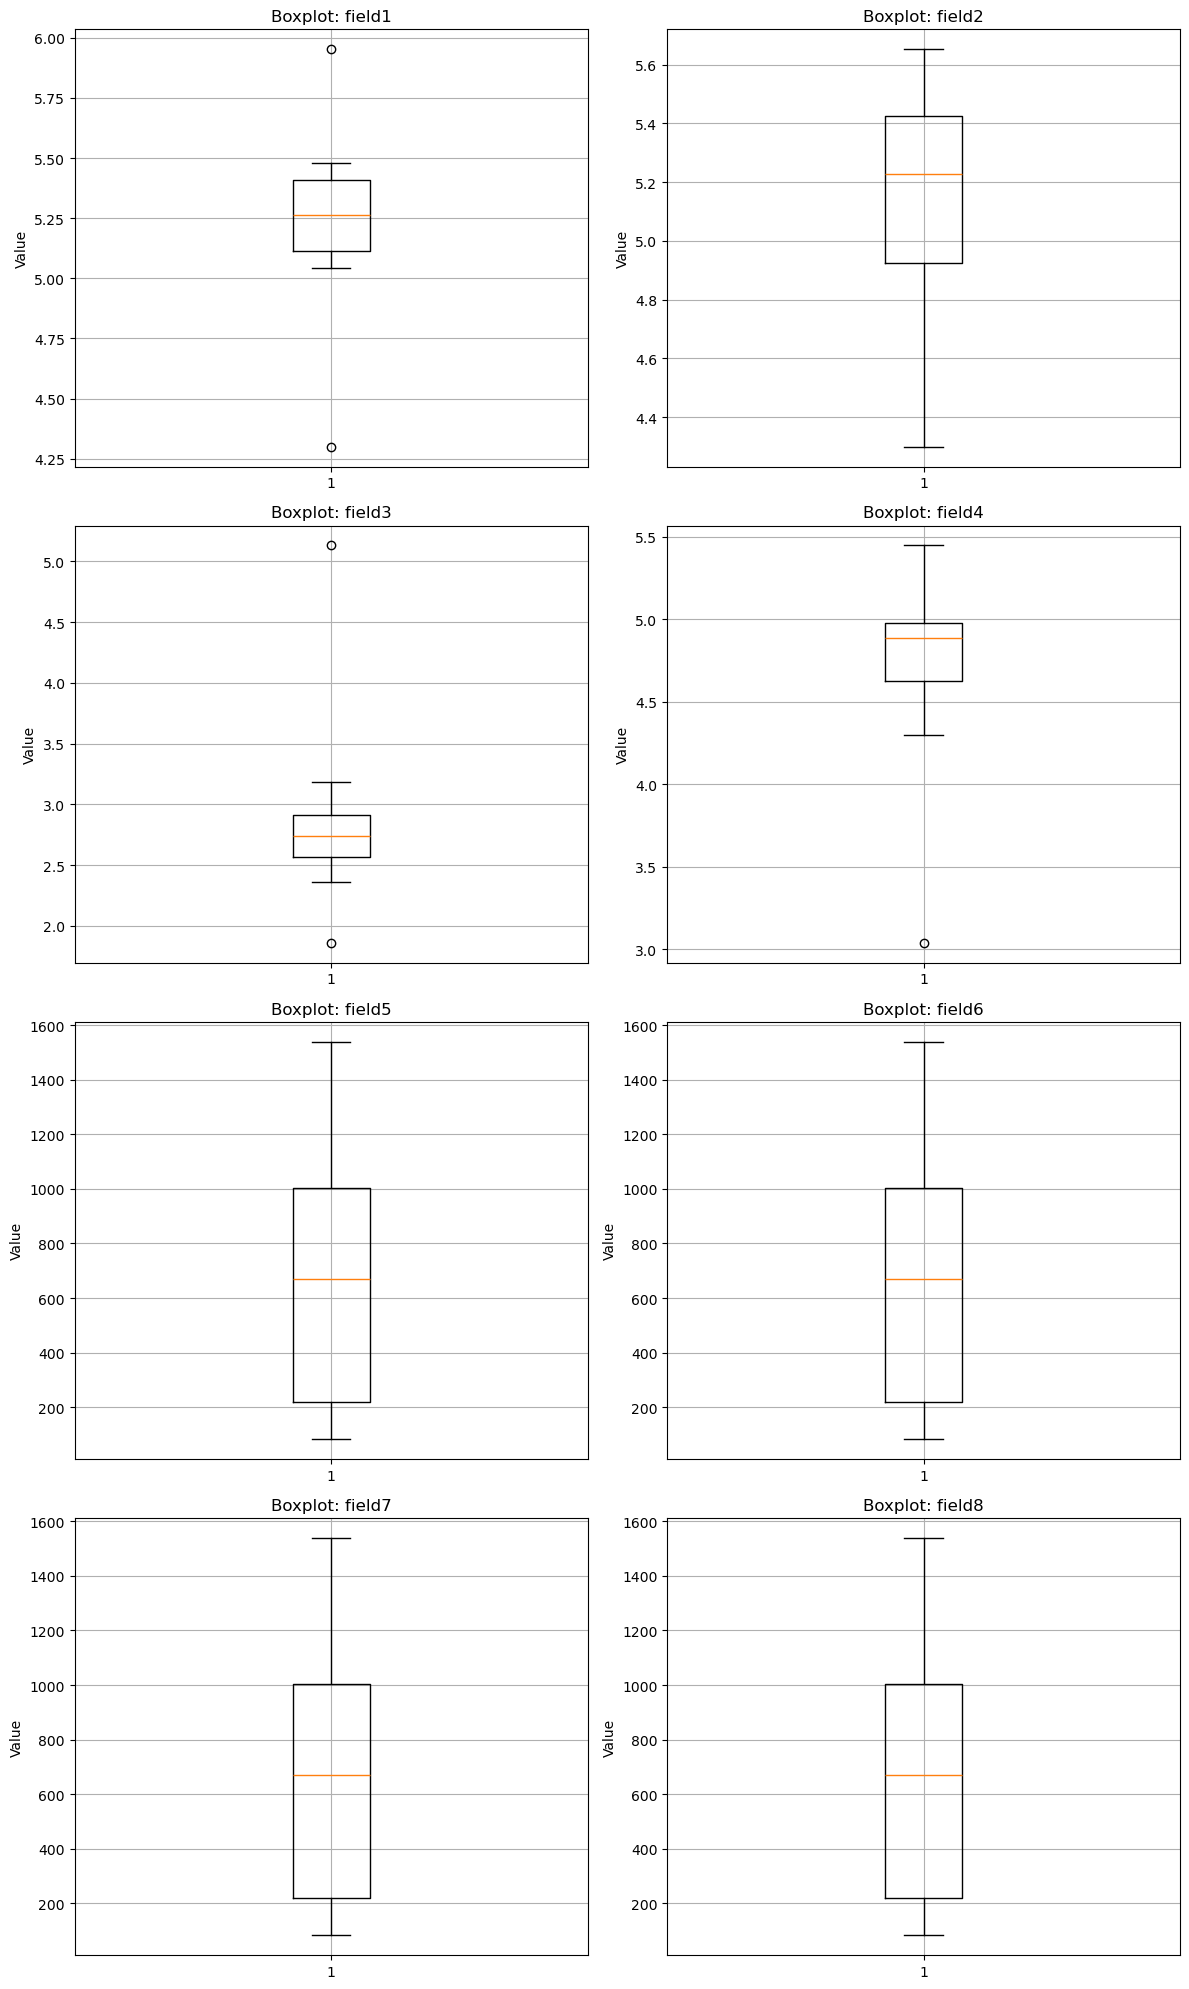

In [62]:
boxplot_func.boxplot(data, streams=None)

In [67]:
from bokeh.plotting import output_notebook, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import MediumContrast3
from bokeh.transform import factor_cmap
from bokeh.io import push_notebook

In [68]:
# Ensure that the output is rendered inside the notebook
output_notebook()

def plot_grouped_bar_chart(df, category_col, value_cols):
    """
    Create a grouped bar chart using Bokeh.

    Parameters:
    df (pd.DataFrame): DataFrame containing categorical and numerical data.
    category_col (str): Column representing categories (e.g., time, labels).
    value_cols (list): List of numerical columns to group in bars.
    """
    categories = df[category_col].astype(str).tolist()
    values = {col: df[col].tolist() for col in value_cols}
    
    x = [(category, col) for category in categories for col in value_cols]
    counts = sum(zip(*[values[col] for col in value_cols]), ())  # Flatten list of tuples
    
    source = ColumnDataSource(data=dict(x=x, counts=counts))
    
    p = figure(x_range=FactorRange(*x), height=350, title=f"Grouped Bar Chart: {category_col}",
               toolbar_location=None, tools="", output_backend="svg")
    
    p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
           fill_color=factor_cmap('x', palette=MediumContrast3, factors=value_cols, start=1, end=2))
    
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None
    
    show(p, notebook_handle=True)  # This ensures the plot appears in the notebook



if 'created_at' in data.index.names:
    data.reset_index(inplace=True)
    
# Example usage (assuming you have a DataFrame 'data')
plot_grouped_bar_chart(data, category_col='created_at', value_cols=['field1', 'field2','field3'])

Loading BokehJS ...